# Projeto 3 - Tem diabete ou não tem

<img src="https://static.tuasaude.com/media/article/dr/nj/diabetes_52276_l.jpg" width="400" height="100"/>

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem diabetes ou não, com base em certas medidas diagnósticas incluídas no conjunto de dados

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from plotnine import *

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
df['Outcome'].drop_duplicates()

0    1
1    0
Name: Outcome, dtype: int64

# Ver se tem valores fora do padrão

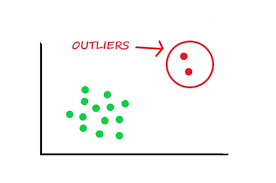

# Separar em Treino, Validação e Teste

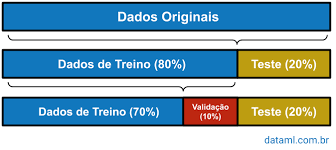

In [68]:
train , test = train_test_split(df,test_size=0.2,random_state=0)  # 80% treino e 20% teste

train , val = train_test_split(train,test_size=0.25,random_state=0)  # 80% de 75% do treino = 70%, e 15% de 80% do teste = 10% em validação


In [69]:
print(f"Base total : {df.shape}")
print(f"Treino : {train.shape}")
print(f"Validação : {val.shape}")
print(f"Teste : {test.shape}")

Base total : (768, 9)
Treino : (460, 9)
Validação : (154, 9)
Teste : (154, 9)


# Retirar colunas que não usaremos no modelo

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [70]:
pd.isna(df).sum().to_frame("Valor Vazio")

,Valor Vazio
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://miro.medium.com/max/2134/1*C5XM-0LZSMBd1EEiYZbYxA.png" width="350" height="100"/>

In [71]:
train.iloc[:,0:7] = MinMaxScaler().fit_transform(train.iloc[:,0:7])
val.iloc[:,0:7] = MinMaxScaler().fit_transform(val.iloc[:,0:7])
test.iloc[:,0:7] = MinMaxScaler().fit_transform(test.iloc[:,0:7])


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Categóricas em numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="600" height="100"/>

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [72]:
train_x = train.drop(columns=['Outcome'],axis=1)
train_y = train['Outcome']

In [73]:
val_x = val.drop(columns=['Outcome'],axis=1)
val_y = val['Outcome']

In [74]:
test_x = test.drop(columns=['Outcome'],axis=1)
test_y = test['Outcome']

In [75]:
val_x.shape

(154, 8)

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://i.ibb.co/N3pbLFp/LR-LDA-DT-KNN-SVM-RF.png" width="200" height="80"/>

In [76]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y)
RF = RandomForestClassifier().fit(train_x,train_y)

# Acurácia, Precision e Recall do Treino

In [77]:
metricas_treino = {
        'Accuracy':  [LR.score(train_x,train_y),
                      LDA.score(train_x,train_y),
                      DT.score(train_x,train_y),
                      KN.score(train_x,train_y),
                      SVM.score(train_x,train_y),
                      RF.score(train_x,train_y)],
        'Precision': [precision_score(train_y, LR.predict(train_x)),
                      precision_score(train_y, LDA.predict(train_x)),
                      precision_score(train_y, DT.predict(train_x)),
                      precision_score(train_y, KN.predict(train_x)),
                      precision_score(train_y, SVM.predict(train_x)),
                      precision_score(train_y, RF.predict(train_x))],
        'Recall' :   [recall_score(train_y,LR.predict(train_x)),
                      recall_score(train_y, LDA.predict(train_x)),
                      recall_score(train_y, DT.predict(train_x)),
                      recall_score(train_y, KN.predict(train_x)),
                      recall_score(train_y, SVM.predict(train_x)),
                      recall_score(train_y, RF.predict(train_x))]
        }

dados = pd.DataFrame(metricas_treino, 
                     columns = ['Accuracy', 'Precision','Recall'],
                     index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.760870,0.732759,0.518293
LDA,0.780435,0.740458,0.591463
DT,1.000000,1.000000,1.000000
KN,0.765217,0.750000,0.512195
SVM,0.680435,0.556291,0.512195
RF,1.000000,1.000000,1.000000


# Acurácia, Precision e Recall da Validação

In [78]:
metricas_validacao = {
        'Accuracy':  [LR.score(val_x,val_y),
                      LDA.score(val_x,val_y),
                      DT.score(val_x,val_y),
                      KN.score(val_x,val_y),
                      SVM.score(val_x,val_y),
                      RF.score(val_x,val_y)],
        'Precision': [precision_score(val_y, LR.predict(val_x),zero_division=1),
                      precision_score(val_y, LDA.predict(val_x)),
                      precision_score(val_y, DT.predict(val_x)),
                      precision_score(val_y, KN.predict(val_x)),
                      precision_score(val_y, SVM.predict(val_x)),
                      precision_score(val_y, RF.predict(val_x))],
        'Recall' :   [recall_score(val_y,LR.predict(val_x)),
                      recall_score(val_y, LDA.predict(val_x)),
                      recall_score(val_y, DT.predict(val_x)),
                      recall_score(val_y, KN.predict(val_x)),
                      recall_score(val_y, SVM.predict(val_x)),
                      recall_score(val_y, RF.predict(val_x))]
        }

dados = pd.DataFrame(metricas_validacao, 
                     columns = ['Accuracy', 'Precision','Recall'],
                     index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.753247,0.756757,0.491228
LDA,0.759740,0.738095,0.543860
DT,0.720779,0.625000,0.614035
KN,0.675325,0.571429,0.491228
SVM,0.636364,0.508197,0.543860
RF,0.740260,0.688889,0.543860


# Acurácia, Precision e Recall do Teste

In [79]:
metricas_teste = {
        'Accuracy':  [LR.score(test_x,test_y),
                      LDA.score(test_x,test_y),
                      DT.score(test_x,test_y),
                      KN.score(test_x,test_y),
                      SVM.score(test_x,test_y),
                      RF.score(test_x,test_y)],
        'Precision': [precision_score(test_y, LR.predict(test_x)),
                      precision_score(test_y, LDA.predict(test_x)),
                      precision_score(test_y, DT.predict(test_x)),
                      precision_score(test_y, KN.predict(test_x)),
                      precision_score(test_y, SVM.predict(test_x)),
                      precision_score(test_y, RF.predict(test_x))],
        'Recall' :   [recall_score(test_y, LR.predict(test_x)),
                      recall_score(test_y, LDA.predict(test_x)),
                      recall_score(test_y, DT.predict(test_x)),
                      recall_score(test_y, KN.predict(test_x)),
                      recall_score(test_y, SVM.predict(test_x)),
                      recall_score(test_y, RF.predict(test_x))]
        }

dados = pd.DataFrame(metricas_teste, 
                     columns = ['Accuracy', 'Precision','Recall'],
                     index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.772727,0.596774,0.787234
LDA,0.753247,0.561644,0.872340
DT,0.623377,0.430380,0.723404
KN,0.720779,0.555556,0.425532
SVM,0.681818,0.478261,0.468085
RF,0.766234,0.600000,0.702128


## Matriz de confusão + Métricas
<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width="350" height="80"/>

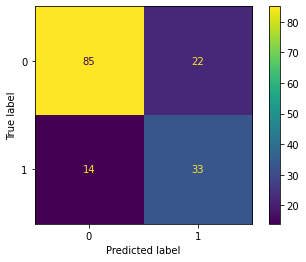

In [80]:
plot_confusion_matrix(RF, test_x, test_y)
plt.show()

## Curva ROC
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/250px-Roc-draft-xkcd-style.svg.png" width="350" height="80"/>

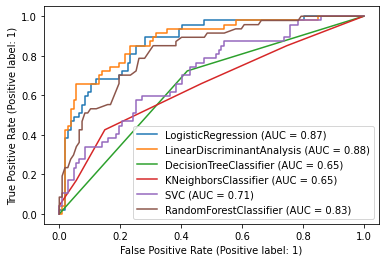

In [81]:
#classifiers = [LR, LDA, DT, KN, SVM, RF]
plot_roc_curve(LR, test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT, test_x, test_y, ax=plt.gca())
plot_roc_curve(KN, test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF, test_x, test_y, ax=plt.gca())

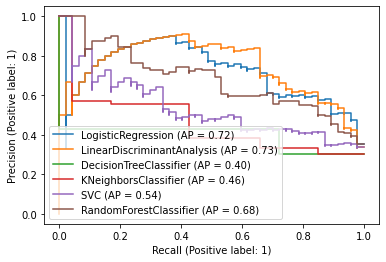

In [82]:
plot_precision_recall_curve(LR, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(LDA, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(DT, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(KN, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(SVM, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(RF, test_x, test_y, ax=plt.gca())